# Analizando dados do dataSUS 2.0

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('sinasc_RO_2019.csv')
df = pd.DataFrame(dados)

In [3]:
#Limpando os dados 
df.dropna(subset=['APGAR5'], inplace=True)
df.dropna(subset=['SEXO'], inplace=True)
df.dropna(subset=['GESTACAO'], inplace=True)


#### 2) Categorizando a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:

intervalos = [0, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_categorizado'] = pd.cut(df['APGAR5'], bins=intervalos, labels=categorias)
contagem = df['APGAR5_categorizado'].value_counts()

print(df['APGAR5_categorizado'])


0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5_categorizado, Length: 25705, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']


In [5]:
APGAR5_soma = df['APGAR5_categorizado'].value_counts().sum()
APGAR5_soma
GESTACAO_soma = df['GESTACAO'].value_counts().sum()

#### 3) Um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação.

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

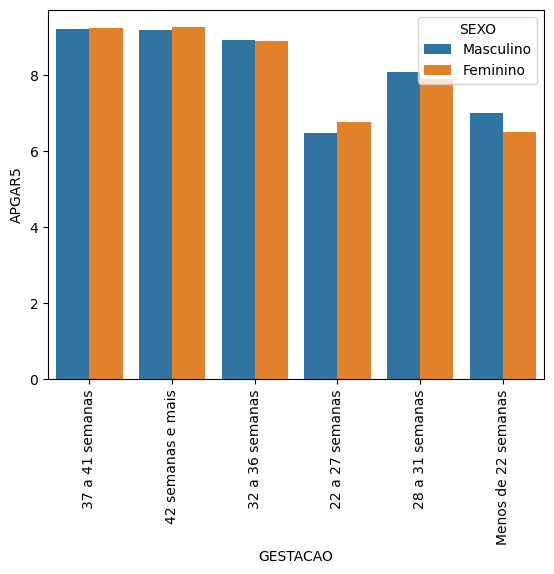

In [10]:
dist_apgar5 = sns.barplot(data= df
                 , y="APGAR5"
                 , x="GESTACAO"
                 , hue='SEXO'
                 , errorbar= None)

dist_apgar5.set_xticklabels(dist_apgar5.get_xticklabels(), rotation=90)


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calculei os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
tabela_cruzada.sum(axis = 1)
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis = 1), axis = 0)
percentual_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Aqui veremos se tal afirmação tem relevância.

<Axes: xlabel='GESTACAO'>

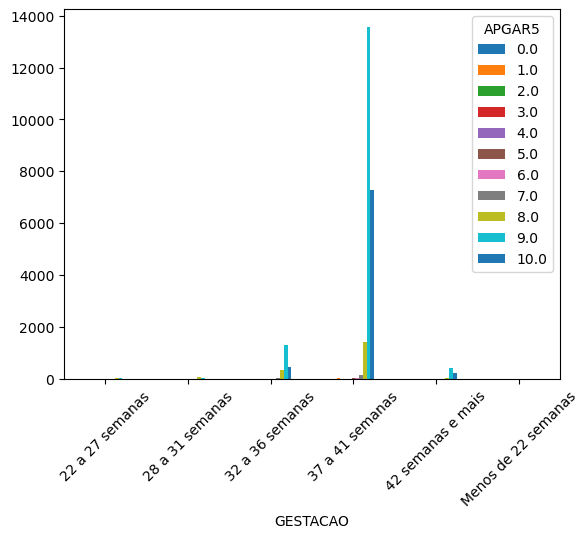

In [8]:
tabela_cruzada.plot.bar(rot=45)

 Com base na análise dos dados, podemos **concluir que a incidência de APGAR5 elevado é mais alta durante o período de 37 a 41 semanas de gestação.** Isso pode ser explicado pela quantidade de bebês que nascem nesse intervalo. No entanto, observou-se que, mesmo para os bebês nascidos entre 32 e 36 semanas de gestação (considerados prematuros), **a taxa de APGAR5 ainda é elevada.** Dessa forma, podemos caracterizá-los como prematuros com bom prognóstico.

#### 7) Vendo se há relação entre APGAR5 e o peso do bebê.

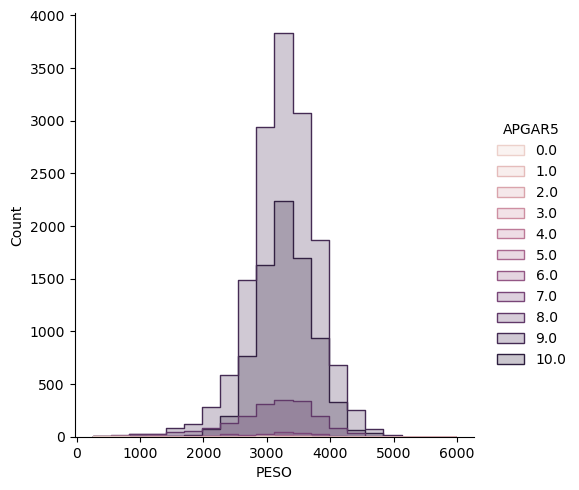

In [9]:
# histograma com covariáveis
sns.displot(data = df
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
           )

Com base na análise dos dados, constatou-se que há uma **incidência significativamente maior de APGAR5 em crianças com peso entre 3 e 4 quilos.**